<a href="https://colab.research.google.com/github/Muhamadsulton/kaggle/blob/main/%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
data = pd.read_csv('titanic_train.csv',header = 0, index_col = False)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# просмотр колонок в датафрейме
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# посчитать в таблицах сколько значений nan
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# просмотр размерности датафрейма
np.shape(data)

(891, 12)

In [ ]:
#выведение в процентах сколько данных отсутствует в датафрейме
def missing_values_table(data):
        # Общее количество пропущенных значений
        mis_val = data.isnull().sum()
        # Доля пропущенных значений
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        # Таблица с результатом расчета
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Переименовываем столбцы
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Сортируем по столбцу с долей пропущенных значений в порядке убывания
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Вывод сводной информации
        print("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# Статистика пропущенных значений
missing_values = missing_values_table(data)
missing_values.head(10)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
#удаляем колонку кабина потому что содержит максимальное количество пропущенных данных
data = data.drop(['Cabin'],axis = 1)

In [ ]:
#замена категориальных данных в датафреме
data["Sex"] = data['Sex'].map({"female":0,"male":1})

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
#Удаляем столбцы имя и билет поскольку они неинформативные
data = data.drop(['Name','Ticket','PassengerId'],axis = 1)

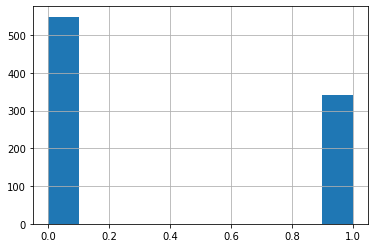

In [ ]:
data['Survived'].hist()

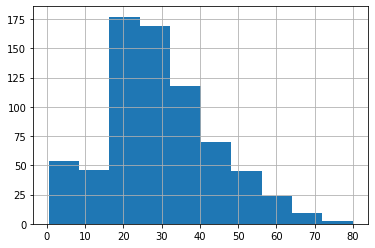

In [ ]:
data['Age'].hist()

In [ ]:
data['Age'].median()

28.0

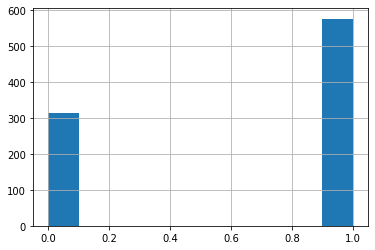

In [ ]:
data['Sex'].hist()

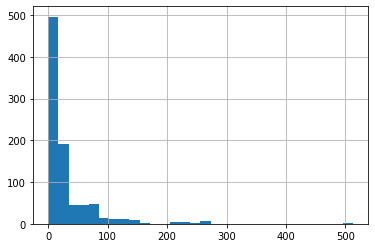

In [ ]:
data['Fare'].hist(bins = 30)

In [ ]:
data = data[data['Fare'] < 300]

In [ ]:
data['Embarked'].value_counts()

S    644
C    165
Q     77
Name: Embarked, dtype: int64

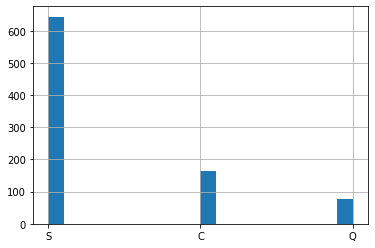

In [ ]:
data['Embarked'].hist(bins = 20)

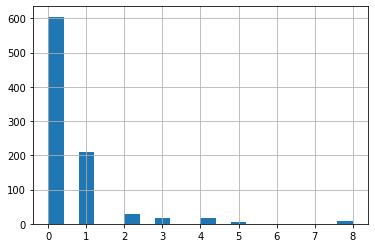

In [ ]:
data['SibSp'].hist(bins = 20)

In [ ]:
# Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров.
not_survived = data['Survived'].value_counts()[0]
survived = data['Survived'].value_counts()[1]
print(survived / (not_survived + survived))

0.38175675675675674


In [ ]:
#Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? 
#Посчитайте корреляцию Пирсона между признаками SibSp и Parch.
data[['SibSp','Parch']].corr(method='spearman')

,SibSp,Parch
SibSp,1.000000,0.451507
Parch,0.451507,1.000000


In [ ]:
data[data['Survived']==1].mean()#вывод средний возраст погибших

Survived     1.000000
Pclass       1.958702
Sex          0.315634
Age         28.270627
SibSp        0.477876
Parch        0.466077
Fare        44.289799
dtype: float64

ЗАПОЛНЕНИЕ ПРОПУЩЕННЫХ ДАННЫХ

In [ ]:
data.groupby('Sex').Age.median() #медианы возраста для каждого пола
 
median_f = 27 #медиана возраста для женщин 
median_m = 29 #медиана возраста для мужчин 
 
for i in data['Age']:  #цикл заполняющий пропущенные значения 'Age' в зависимости от пола на медианы м/ж 
    if [data['Sex'] == 'female']:
        data = data.fillna({'Age': median_f})
    if [data['Sex'] == 'male']:
        data = data.fillna({'Age': median_m})


In [ ]:
data['Embarked'].isnull().sum()

2

In [ ]:
data['Embarked'].mode()

0    S
dtype: object

In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
#переход в OneHotEncoding для категориальных переменных
data = pd.get_dummies(data)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
data_corr = data.corr()['Survived']

In [ ]:
data_corr

Survived      1.000000
Pclass       -0.334068
Sex          -0.545899
Age          -0.064180
SibSp        -0.033395
Parch         0.082157
Fare          0.261742
Embarked_C    0.160969
Embarked_Q    0.004981
Embarked_S   -0.143763
Name: Survived, dtype: float64

In [ ]:
X = data.drop(['Survived'],axis = 1)
target = data['Survived']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


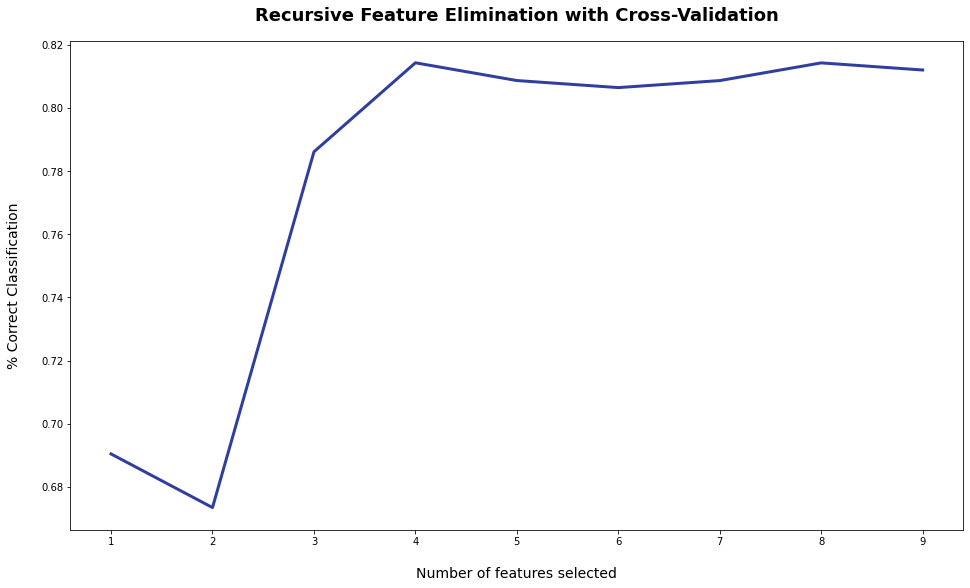

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
#какие именно из этих признаков лучшие
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[3 4 6 7 8]


In [ ]:
#количество наилучших признаков
rfecv.n_features_

4

In [ ]:
# важность каждого признака
rfecv.estimator_.feature_importances_

array([0.09707216, 0.28132002, 0.28207225, 0.33953556])

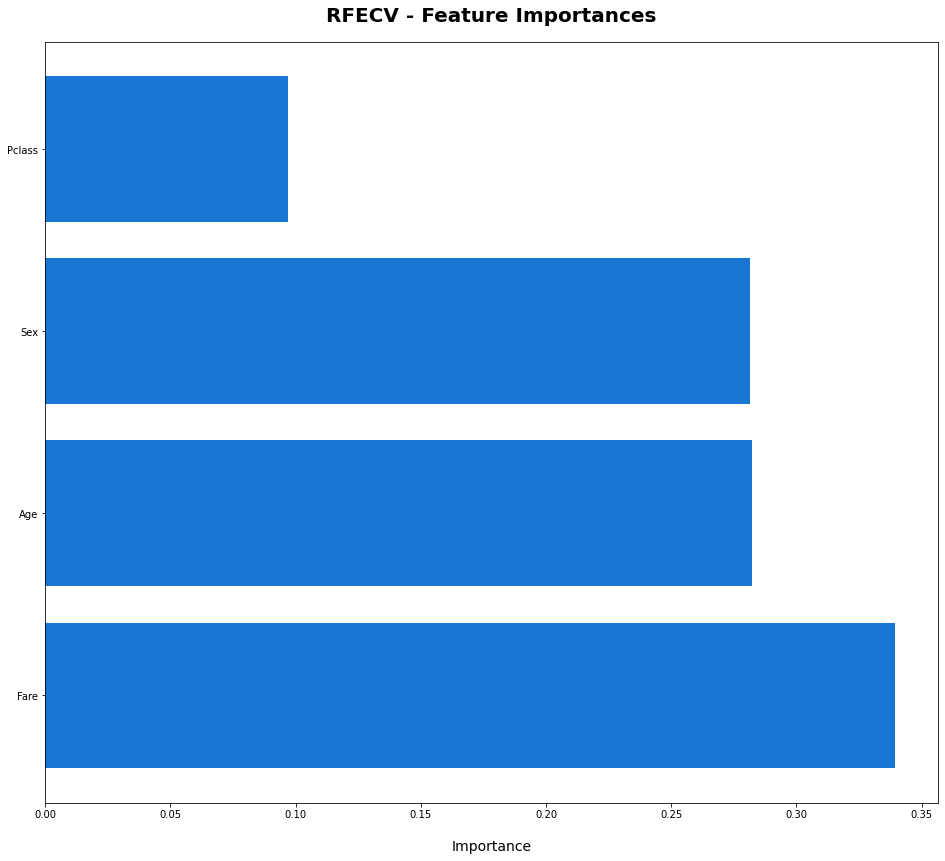

In [ ]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

СТАНДАРТИЗАЦИЯ ПРИЗНАКА

In [ ]:
stand = StandardScaler()
X = stand.fit_transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score

РАЗБИЕНИЕ НА ОБУЧАЮЩИЙ И ТЕСТОВЫЙ НАБОР

In [ ]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

ПРОВЕДЕДЕНИЕ БАЗОВОЙ КЛАССИФИКАЦИИ

In [ ]:
dummy = DummyClassifier(strategy = 'uniform', random_state = 42)

In [ ]:
dummy.fit(X_train,target_train)

DummyClassifier(constant=None, random_state=42, strategy='uniform')

In [ ]:
dummy.score(X_test,target_test)

0.4606741573033708

СЛУЧАЙНЫЕ ЛЕСА

In [ ]:
classifier = RandomForestClassifier()

In [ ]:
classifier.fit(X_train,target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
classifier.score(X_test,target_test)

0.8426966292134831

К-БЛИЖАЙШИХ СОСЕДЕЙ

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10)

In [ ]:
neigh.fit(X_train,target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
pred_knn = neigh.predict(X_test)
f1_score(target_test,pred_knn,average='micro')

0.8370786516853933

In [ ]:
cross_knn = cross_val_score(neigh,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_knn.mean()

0.802939122706786

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ

In [ ]:
log = LogisticRegression()

In [ ]:
model_log = log.fit(X_train, target_train)

In [ ]:
model_log.score(X_test,target_test)

0.8202247191011236

In [ ]:
cross_log = cross_val_score(log,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_log.mean()

0.789417888656129

ДЕРЕВЬЯ РЕШЕНИЙ

In [ ]:
tree = DecisionTreeClassifier(max_depth=6,min_samples_leaf=8,min_samples_split=2)

In [ ]:
model_tree = tree.fit(X_train, target_train)

In [ ]:
model_tree.score(X_test, target_test)

0.848314606741573

In [ ]:
cross_tree = cross_val_score(tree,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_tree.mean()

0.8164413127658225

МЕТОД МАШИННО ОПОРНЫХ ВЕКТОРОВ

In [ ]:
svc = SVC(C= 1000, gamma = 0.0001, kernel = 'rbf')

In [ ]:
model_svc = svc.fit(X_train, target_train)

In [ ]:
model_svc.score(X_test, target_test)

0.8202247191011236

In [ ]:
cross_svc=cross_val_score(svc,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_svc.mean()

0.7882562051672697

АДАБУСТ

In [ ]:
adaboost = AdaBoostClassifier()

In [ ]:
model_adaboost = adaboost.fit(X_train, target_train)

In [ ]:
model_adaboost.score(X_test, target_test)

0.8314606741573034

In [ ]:
cross_ada = cross_val_score(adaboost,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_ada.mean()

0.7995810321843457

НАИВНЫЙ ГАУССОВСКИЙ КЛАССИФИКАТОР

In [ ]:
bayes = GaussianNB()

In [ ]:
model_bayes = bayes.fit(X_train, target_train)

In [ ]:
model_bayes.score(X_test, target_test)

0.797752808988764

In [ ]:
cross_bayes = cross_val_score(model_bayes,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_bayes.mean()

0.773649463594236

ГРАДИЕНТНЫЙ БУСТИНГ

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, target_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# предсказать значения тестовой выборки
predictions_gb = gb.predict(X_test)
# посмотреть на точность предсказания 
f1_score(target_test, predictions_gb,average='micro')

0.8595505617977528

In [ ]:
cross_gb = cross_val_score(gb,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_gb.mean()

0.8220783342855329

XGBOOST

In [ ]:
import xgboost

In [ ]:
model_xgboost = xgboost.XGBClassifier()
model_xgboost.fit(X_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# предсказать значения тестовой выборки
predictions_xgboost = model_xgboost.predict(X_test)
# посмотреть на точность предсказания 
f1_score(target_test, predictions_xgboost,average='micro')

0.8595505617977528

ОПТМИЗИАЦИЯ РЕШЕТЧЕТЫМ ПОИСКОМ

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ОПТИМИЗАЦИЯ

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)
hyperparametrs = dict(C=C, penalty=penalty)

In [ ]:
grid_search_logit = GridSearchCV(log, hyperparametrs, cv = 5, verbose = 0)

In [ ]:
best_model_logit = grid_search_logit.fit(X_train, target_train)

In [ ]:
print('Лучший штраф:', best_model_logit.best_estimator_.get_params()['penalty'])
print('Лучший C:', best_model_logit.best_estimator_.get_params()['C'])

Лучший штраф: l2
Лучший C: 1.0


К-БЛИЖАЙШИХ СОСЕДЕЙ ОПТИМИЗАЦИЯ

In [ ]:
n_neighbors = range(1,21)
param_grid = {'n_neighbors':n_neighbors,}

In [ ]:
gs = GridSearchCV(neigh, param_grid, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_knn = gs.fit(X_train,target_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [ ]:
best_model_knn.best_params_

{'n_neighbors': 10}

ДЕРЕВЬЯ РЕШЕНИЙ ОПТИМИЗАЦИЯ

In [ ]:
param_grid_clf = {
              'max_depth': range(1,71),#глубина дерева от 1 до 71 
              'min_samples_split': range(2,11),
              'min_samples_leaf':range(2,11)}

In [ ]:
grid_search_tree = GridSearchCV(tree, param_grid_clf, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_tree = grid_search_tree.fit(X_train,target_train)

Fitting 5 folds for each of 5670 candidates, totalling 28350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 13384 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 24584 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 28350 out of 28350 | elapsed:  1.4min finished


In [ ]:
best_model_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}

СЛУЧАЙНЫЕ ЛЕСА ОПТИМИЗАЦИЯ

In [ ]:
#решетчетый поиск для оптимизации случайных лесов
n_estimators = [300,500,700]
param_grid = {'n_estimators':n_estimators,
              'min_samples_leaf':range(2,10),
              'min_samples_split':range(2,10),
              'max_depth': range(1,16,2)}#глубина дерева от 1 до 30 с шагом 1

In [ ]:
grid_search_rfc = GridSearchCV(rfc, param_grid, cv = 5, verbose=1, n_jobs=-1)

In [ ]:
best_model_rfc = grid_search_rfc.fit(X_train,target_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 54.6min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 66.6min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 79.8min
[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed: 85.3min finished


In [ ]:
best_model_rfc.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
rfc_optim = RandomForestClassifier(n_estimators = 300,criterion='entropy',max_depth=9,min_samples_leaf=2,min_samples_split=2)

In [ ]:
model_rfc_optim = rfc_optim.fit(X_train,target_train)

In [ ]:
print(rfc_optim.score(X_test,target_test))

0.8707865168539326


In [ ]:
cross_rfc_optim = cross_val_score(rfc_optim,X,target,cv=5,n_jobs=-1)

In [ ]:
cross_rfc_optim.mean()

0.8299625468164795

ГРАДИЕНТНЫЙ БУСТИНГ ОПТИМИЗАЦИЯ

In [ ]:
parameters_gb = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [ ]:
grid_gb = GridSearchCV(gb,parameters_gb,cv=5,verbose=1,n_jobs=-1)

In [ ]:
best_model_gb = grid_gb.fit(X_train,target_train)

Fitting 5 folds for each of 84672 candidates, totalling 423360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19740 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 28540 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 38940 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 50940 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 64540 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 79740 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 96540 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 114940 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 134940 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 156540 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 1

In [ ]:
best_model_gb.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.17272727272727273,
 'min_samples_split': 0.2090909090909091,
 'n_estimators': 10,
 'subsample': 0.9}

ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_test.csv to titanic_test.csv


In [ ]:
#прогназируем для тестовых данных
test = pd.read_csv('titanic_test.csv',header = 0, index_col = False)

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test = test.drop(['Cabin','Name','Ticket','PassengerId'], axis = 1)

In [ ]:
test.groupby('Sex').Age.median() #медианы возраста для каждого пола

Sex
female    27.0
male      27.0
Name: Age, dtype: float64

In [ ]:
median_f = 27 #медиана возраста для женщин 
median_m = 27 #медиана возраста для мужчин 
 
for i in test['Age']:  #цикл заполняющий пропущенные значения 'Age' в зависимости от пола на медианы м/ж 
    if [test['Sex'] == 'female']:
        test = test.fillna({'Age': median_f})
    if [test['Sex'] == 'male']:
        test = test.fillna({'Age': median_m})


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB
None


In [ ]:
test['Fare'].mode()

0    7.75
dtype: float64

In [ ]:
test['Fare'] = test['Fare'].fillna(7.75)

In [ ]:
#замена категориальных данных в датафреме
test["Sex"] = test['Sex'].map({"female":0,"male":1})

In [ ]:
test = pd.get_dummies(data)

In [ ]:
test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
test = test.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis = 1)

In [ ]:
test = test.drop(['Survived'], axis = 1)

In [ ]:
X

array([[ 0.82412268,  0.73779931, -0.54702197, -0.56695903],
       [-1.57529024, -1.35538212,  0.67844   ,  0.9890157 ],
       [ 0.82412268, -1.35538212, -0.24065648, -0.55055689],
       ...,
       [ 0.82412268, -1.35538212, -0.1640651 , -0.17330775],
       [-1.57529024,  0.73779931, -0.24065648, -0.01414627],
       [ 0.82412268,  0.73779931,  0.21889176, -0.5548093 ]])

In [ ]:
test = test.drop(['SibSp','Parch'],axis=1)

In [ ]:
pred_net = network.predict(test)

In [ ]:
fin_net = pd.DataFrame(pred_net)

In [ ]:
fin_net

,0
0,2.165239e-09
1,9.144919e-25
2,7.431123e-10
3,1.539185e-20
4,1.697485e-12
...,...
883,1.801132e-11
884,3.729564e-12
885,8.986600e-14
886,7.971392e-15


In [ ]:
final_pred_gb = gb.predict(test)

In [ ]:
prediciti_gb = pd.DataFrame(final_pred_gb)

In [ ]:
fin_net

,0
0,2.165239e-09
1,9.144919e-25
2,7.431123e-10
3,1.539185e-20
4,1.697485e-12
...,...
883,1.801132e-11
884,3.729564e-12
885,8.986600e-14
886,7.971392e-15


In [ ]:
final_pred = rfc_optim.predict(test)

In [ ]:
prediciti = pd.DataFrame(final_pred)

In [ ]:
prediciti

,0
0,0
1,0
2,0
3,0
4,0
...,...
883,0
884,0
885,0
886,0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_gender_submission.csv to titanic_gender_submission.csv


In [ ]:
sub_d = pd.read_csv('titanic_gender_submission.csv')
sub_d['Survived'] = fin_net
sub_d.to_csv('Submissionsd_11.csv', index = False)

In [ ]:
sub_d = pd.read_csv('titanic_gender_submission.csv')
sub_d['Survived'] = prediciti_gb
sub_d.to_csv('Submissionsd.csv', index = False)

In [ ]:
from google.colab import files
uploaded = files.download('Submissionsd_11.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>